----------- STEP 1 - LOADING DATA FROM THE FILE ---------------------
---
######### SNAPSHOT  408535_99  #########
######### PARAMETER FILE  /home/ubuntu/projects/S2B/models/408535_99/408535_99.param  #########
* Loading data from file /home/ubuntu/projects/S2B/models/408535_99/408535_99 ...
* Centering the data...
* Aligning the data...
* Bar defined, aligning to 1.5 kpc
* Realigning bar using |z| < 0.5 
* Bar realigned by 176.42 degrees
----------- STEP 2 - FACE-ON NUMBER DENSITY FOR THE WHOLE MODEL ---------------------
---
######### Face-on number dencity for the whole model. #########
* Min stellar age - 0.0 Gyr.
* Max stellar age - 460.08 Gyr.
** Stars in snapshot -  412932
Image saved to /home/ubuntu/projects/S2B/images/bar-shapes/408535_99/408535_99_density_5.0kpc.png


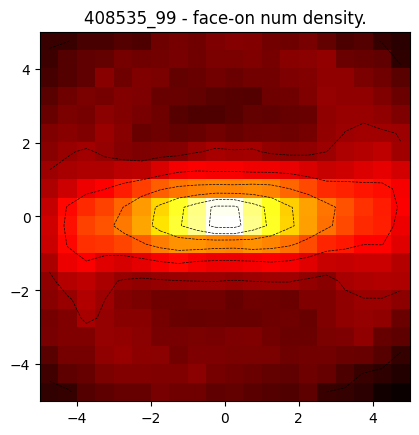

----------- STEP 3 - FACE-ON NUMBER DENSITY PER AGE GROUP ---------------------
---
######### Face-on number dencity per age group. #########
Image saved to /home/ubuntu/projects/S2B/images/bar-shapes/408535_99/408535_99_face_on_density_by_age_3grp_5.0kpc.png


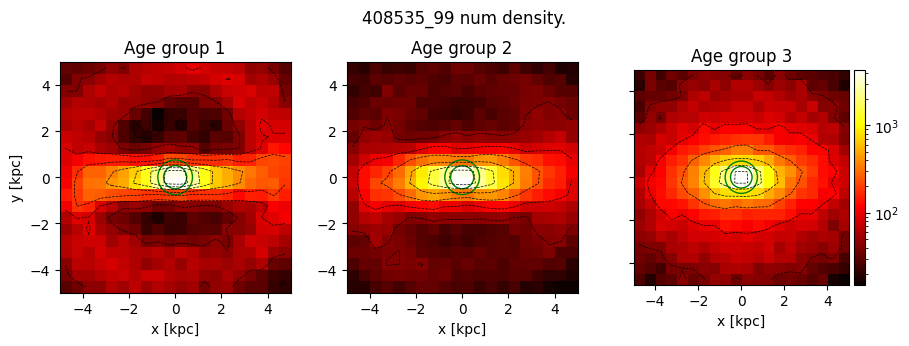

----------- STEP 4 - FACE-ON BAR ELLIPTICITY PER AGE GROUP ---------------------
---
######### Face-on bar ellipticity per age group. #########
*** Age group 1 ellipticity: 0.32
*** Age group 2 ellipticity: 0.31
*** Age group 3 ellipticity: 0.17
----------- STEP 6a - ROTATE THE MODEL TO GALACTIC PLANE EDGE-ON -----------
---
----------- STEP 6b - ROTATE THE MODEL BAR END-ON -----------
---
----------- STEP 7a - EDGE-ON NUMBERF DENSITY PER AGE GROUP ---------------------
---
######### Edge-on number dencity per age group. #########


/home/ubuntu/projects/S2B/code/shared/my_functions.py:320: RuntimeWarning: divide by zero encountered in log10
  axes[i].contour(xcent, ycent, np.log10(stat2d_lst[i]), linewidths = 0.5, linestyles = 'dashed', colors = 'k')


Image saved to /home/ubuntu/projects/S2B/images/bar-shapes/408535_99/408535_99_end_on_density_by_age_3grp_5.0kpc.png


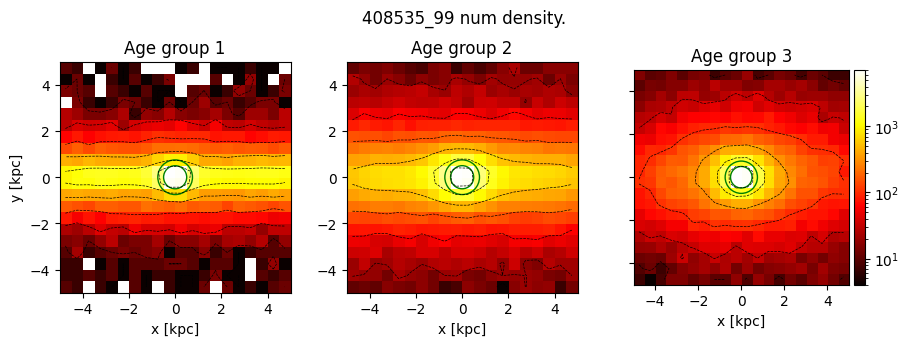

----------- STEP 7b - EDGE-ON SIGMA DISTRIBUTION PER AGE GROUP ---------------------
---
######### Edge-on sigma per age group. #########
Image saved to /home/ubuntu/projects/S2B/images/sigma-shapes/408535_99/408535_99_sigma_by_age_3grp_5.0kpc.png


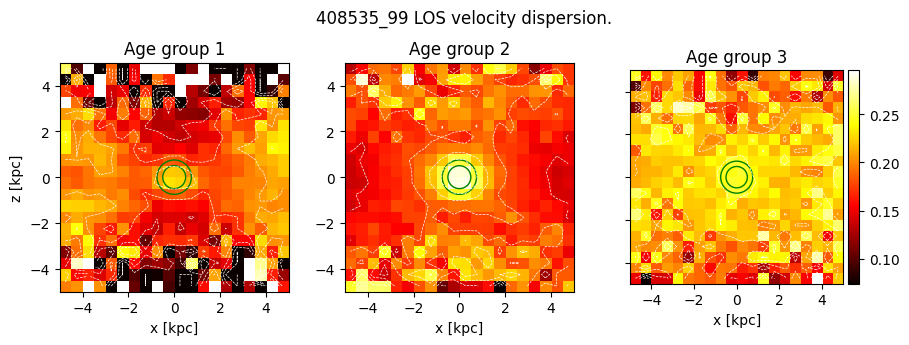

----------- STEP 7d - EDGE-ON SIGMA AMPLITUDE PER AGE GROUP - COMBINED -----------
---
######### Edge-on sigma amplitude per age group. #########
######### combined Fourier moments 4 6


/home/ubuntu/environments/astro/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ubuntu/environments/astro/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ubuntu/environments/astro/lib/python3.10/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Age group 1 - Fm 4 - AMPLITUDE peak in [0:1] kpc area is 0.02 at radius 0.8 kpc.
Age group 1 - Fm 6 - AMPLITUDE peak in [0:1] kpc area is 0.02 at radius 0.8 kpc.
Age group 2 - Fm 4 - AMPLITUDE peak in [0:1] kpc area is 0.03 at radius 0.4 kpc.
Age group 2 - Fm 6 - AMPLITUDE peak in [0:1] kpc area is 0.01 at radius 0.6 kpc.
Age group 3 - Fm 4 - AMPLITUDE peak in [0:1] kpc area is 0.02 at radius 0.6 kpc.
Age group 3 - Fm 6 - AMPLITUDE peak in [0:1] kpc area is 0.01 at radius 0.6 kpc.
Image saved to /home/ubuntu/projects/S2B/images/sigma-shapes/408535_99/408535_99_sigma_amp_comb_by_age_3grp_5.0kpc.png
On-screen ploting is turned off.


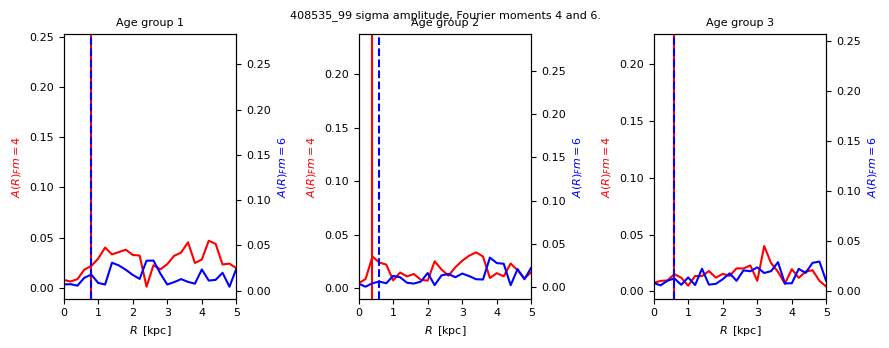

In [6]:
"""

This code calculates and plots the features of Pynbody models, focusing on the bar shape face-on and sigma shape edge-on per age group
- Face-on number density
- Face-on bar ellipticity
- Face-on bar length aproximation using Fourier moment 2
- Edge-on number density and sigma
- Edge-on sigma shape aproximation using Fourier moments 4 andf 6

"""

import pynbody as pb
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.stats as stats
import sys
from scipy.signal import find_peaks
import matplotlib.cm as cm

import my_functions as mf

# Working directories
model = 'run732HF'
model = 'run739HF'
model = '408535_99' # TNG50 skinny bar from Stuart Andersson
#model = 'run741CU' # Same age, problems with breaking into age groups
#model = 'SB_models'
#model = 'SB_nogas_models' # Same age, problems with breaking into age groups
base_dir = '/home/ubuntu/projects/S2B/'
model_dir = base_dir + "models/" + model + "/"
bar_image_dir = base_dir + "images/bar-shapes/" + model + "/"
sigma_image_dir = base_dir + "images/sigma-shapes/" + model + "/"

# Control switches
# True if we read snapshots from the model directohry
load_data = True
#load_data = False

manual_snap_list = True
manual_snap_list = False

# True if the nuclear bar is considered
ncl_bar = True
ncl_bar = False

# Align the bar during the data load
bar_align = True

# Turn ON and OFF logging in functions
log = True
#log = False

# print out datasets and metadata
verbose_log = True
verbose_log = False

# Turn ON and OFF show plotting in functions
show_plot = True
#show_plot = False

# save plots to the inage_dir folder
save_file = True
#save_file = False

# Plot face-on number density after rotating the dataset
verbose_bar_plot = True    
#verbose_bar_plot = False

# Plot face-on number density per age group
plot_density_face_on = True  
#plot_density_face_on = False

# Plot bar Amp/Phase per age group
plot_bar_amplitude = True   
plot_bar_amplitude = False

# Plot ellipticity per radius for bar fase-on, aligned to X-axis
plot_bar_ellipticity = True 
#plot_bar_ellipticity = False

# Plot bar end-on LOS sigma per age group
plot_LOS_sigma = True
#plot_LOS_sigma = False

# Plot bar end-on LOS sigma combined Fourier m 4 and 6 per age group
#plot_LOS_sigma_combined = True       
#plot_LOS_sigma_combined = False

# Plot LOS sigma Ampplitude per Fourier moment per age group
plot_sigma_single_amplitude = True 
plot_sigma_single_amplitude = False

# Plot LOS sigma Amplitude with combined Fourier moment 4 and 6 per age group
plot_sigma_combined_amplitude = True 
#plot_sigma_combined_amplitude = False

# Plot LOS sigma Amplitude and ellipticity timeline with combined Fourier moment 4 and 6 per age group
plot_sigma_amplitude_ellipticity_timeline = True
plot_sigma_amplitude_ellipticity_timeline = False

plot_bar_ellipticity_timeline = True
plot_bar_ellipticity_timeline = False

plot_sigma_amp_timeline = True
plot_sigma_amp_timeline = False

model_high_res = True
model_high_res = False

if model_high_res:
    bin_width = 0.1 # kpc - for Amp/Phase calculations
    bin_arc = 10 # degrees

    bins = 30 # for 2D statistic calculations, both number density and sigma
    xlim, ylim = 1., 1. # kpc for nuclear bar

    bins = 50 # for a zoom-out to the radius of 6 kpc
    xlim, ylim = 6.6, 6.6 # kpc - whole model, primary bar
else:
    # TNG50 low-resolution data
    bin_width = 0.2 # kpc - for Amp/Phase calculations
    bin_arc = 15 # degrees

    bins = 20 # for 2D statistic calculations, both number density and sigma
    xlim, ylim = 5., 5. # kpc - primary bar

cmap_dens = "hot"
cmap_velo = "hot"

mass_fact = 1

barFm = 2 # Fourier moment for bar
sigmaFm = [4,6] # Fourier moment for sigma

aF_peaks = []
e_list = []
snap_ages = []

if manual_snap_list:
    #fnames = ['run732HF.01200','run732HF.01210','run732HF.01220','run732HF.01230','run732HF.01240','run732HF.01250','run732HF.01260']
    #fnames = ['run732HF.01270','run732HF.01280','run732HF.01290','run732HF.01300','run732HF.01310','run732HF.01320','run732HF.01330']
    #fnames = ['run732HF.01340','run732HF.01350','run732HF.01360','run732HF.01370','run732HF.01380','run732HF.01390']
    #fnames = ['run732HF.01400','run732HF.01500','run732HF.01600','run732HF.01700','run732HF.01800','run732HF.01900']
    fnames = ["run739HF.01400", "run739HF.01500", "run739HF.01900", "run739HF.02000", "run739HF.02100"]
else:
    fnames , params = mf.list_snaps(model_dir,verbose_log)

for fname in fnames:
    
    if load_data:
        file = model_dir + fname
        paramfile = model_dir + model + '.param'

        print("----------- STEP 1 - LOADING DATA FROM THE FILE ---------------------")
        print("---")
        print("######### SNAPSHOT ", fname, " #########")
        print("######### PARAMETER FILE ", paramfile, " #########")

        sn = mf.pbload(file, paramfile, ncl_bar, bar_align, log, verbose_log)

        sn.physical_units()

    if verbose_bar_plot:
        print("----------- STEP 2 - FACE-ON NUMBER DENSITY FOR THE WHOLE MODEL ---------------------")
        print("---")
        print("######### Face-on number dencity for the whole model. #########")
        # Extract NP arrays and mask central area xlim by ylim
        x,y,z,m,age,tf = mf.extract_np(sn)
        x,y,z,m,age,tf = mf.mask_np(x,y,z,m,age,tf,xlim,ylim)

        # Sanity check plot
        # mf.plot_density_hist2d(x,y) # The Stuart's way
        mf.plot_density(cmap_dens,x,y,z,age,xlim,ylim,bins,fname,bar_image_dir,save_file,show_plot)
    
    ###
    # Plot number densities by age group  
    ###

    if plot_density_face_on:
        print("----------- STEP 3 - FACE-ON NUMBER DENSITY PER AGE GROUP ---------------------")
        print("---")
        print("######### Face-on number dencity per age group. #########")
        pos = "_face_on"
        mf.plot_density_by_age(cmap_dens,sn,pos,xlim,ylim,bins,fname,bar_image_dir,save_file,show_plot,verbose_log)
         
    ###
    # Bar ellipticity calculation and plotting
    ###

    if plot_bar_ellipticity:
        print("----------- STEP 4 - FACE-ON BAR ELLIPTICITY PER AGE GROUP ---------------------")
        print("---")
        print("######### Face-on bar ellipticity per age group. #########")
        e_list_sn =  mf.bar_ellipticity_by_age(sn,xlim,ylim,bins,fname,bar_image_dir,save_file,show_plot,verbose_log)
        e_list.append(e_list_sn)

    ###
    # Bar length calculation and plotting
    ###

    if plot_bar_amplitude:
        print("----------- STEP 5 - FACE-ON BAR AMPLITUDE PER AGE GROUP ---------------------")
        print("---")
        print("######### Face-on bar amplitude per age group. #########")
        mf.bar_length_by_age_Fm(cmap_dens,sn,bin_width,xlim,barFm,fname,bar_image_dir,save_file,show_plot,verbose_log)

    ###
    # Calculate and plot LOS velocity dispersion (sigla_LOS)
    ###

    if plot_LOS_sigma:
        print("----------- STEP 6a - ROTATE THE MODEL TO GALACTIC PLANE EDGE-ON -----------")
        print("---")

        # Rotating the data - bar aligned to Y-axis
        angle = -90

        if verbose_log:
            print('* Rotating the data in X-Y to', angle, "deg.")
        sn.rotate_z(angle)

        print("----------- STEP 6b - ROTATE THE MODEL BAR END-ON -----------")
        print("---")

        # Rotating the data - galactic plane edge-on -> bar end-on
        angle = -90

        if verbose_log:
            print('* Rotating the data in Y-Z to', angle, "deg.")
        sn.rotate_x(angle)
    

    if plot_LOS_sigma:

        # Plot number densities by age group
        print("----------- STEP 7a - EDGE-ON NUMBERF DENSITY PER AGE GROUP ---------------------")
        print("---")
        print("######### Edge-on number dencity per age group. #########")
        pos = "_end_on"
        mf.plot_density_by_age(cmap_dens,sn,pos,xlim,ylim,bins,fname,bar_image_dir,save_file,show_plot,verbose_log)

        # Calculate and plot LOS velocity dispertion by age group
        print("----------- STEP 7b - EDGE-ON SIGMA DISTRIBUTION PER AGE GROUP ---------------------")
        print("---")
        print("######### Edge-on sigma per age group. #########")
        mf.plot_sigma_by_age(cmap_velo,sn,xlim,ylim,bins,fname,sigma_image_dir,save_file,show_plot,verbose_log)

        if plot_sigma_single_amplitude:
            for Fm in sigmaFm:
                print("----------- STEP 7c - EDGE-ON SIGMA AMPLITUDE PER AGE GROUP ---------------------")
                print("---")
                print("######### Edge-on sigma amplitude per age group. #########")
                print("######### Fourier moment", Fm)
                mf.sigma_shape_by_age_Fm(sn,bin_width,bin_arc,xlim,Fm,fname,sigma_image_dir,save_file,show_plot,verbose_log)

        if plot_sigma_combined_amplitude:
            # Calculate and plot sigma amplitude by age group, Fourier moments 4 and 6
            print("----------- STEP 7d - EDGE-ON SIGMA AMPLITUDE PER AGE GROUP - COMBINED -----------")
            print("---")
            print("######### Edge-on sigma amplitude per age group. #########")
            print("######### combined Fourier moments", sigmaFm[0], sigmaFm[1])
            aF_peaks_sn, snap_age = mf.sigma_shape_by_age_combined_Fm(sn,bin_width,bin_arc,xlim,sigmaFm,fname,sigma_image_dir,save_file,show_plot,verbose_log)

            aF_peaks.append(aF_peaks_sn)
            snap_ages.append(snap_age)

    if load_data:
        # Delete the dataset from the memory once done
        del sn


if plot_sigma_amplitude_ellipticity_timeline:

    if not load_data:
        # 732HF datasets for bins = 30
        aF_peaks = [[[0.05203983665258428, 0.01736198875867254], [0.02063785802461037, 0.01115171161532417], [0.008257953282583901, 0.003017661268743144]], [[0.0481584345108983, 0.03383582231681453], [0.017388275090851002, 0.007515810147159208], [0.00623866983663874, 0.004797357183087563]], [[0.0559775134815109, 0.024218988369874968], [0.015878564227284123, 0.00844612979120427], [0.006950132699656048, 0.0033738272238326267]], [[0.03884818664681085, 0.030585751923634198], [0.015574251015208047, 0.006723664088211857], [0.00774571347015846, 0.002964609713880013]], [[0.06170974976499347, 0.04030974176114399], [0.02613404885037847, 0.0067560281219429036], [0.008226914465947864, 0.003538044402527504]], [[0.1108623097908376, 0.04672848471191356], [0.034631582431522805, 0.015210859800131728], [0.009389040530947596, 0.0041305420636940276]], [[0.08267550626424508, 0.026625728752537846], [0.030653050587204758, 0.00977449084624928], [0.007167137099336486, 0.0025573261442188118]], [[0.06638005929844386, 0.05619858866154252], [0.023202820554087445, 0.011955511905818837], [0.005276516160793406, 0.002741367776818967]], [[0.09503047266985339, 0.052435793196591], [0.033112820438030655, 0.010724157430981162], [0.0060584640885447336, 0.00291670248512861]], [[0.06855035747037244, 0.03997291783567501], [0.02554674477287103, 0.010905054163156984], [0.005015320921141888, 0.004058027444178632]], [[0.0656835681271622, 0.041580159244513595], [0.027066312443614068, 0.013294990647597338], [0.00516319618782835, 0.003362105466132848]], [[0.057224913423948406, 0.03167419738927574], [0.0304606783277795, 0.012386833087604621], [0.00576853895167448, 0.003089631872260613]], [[0.05919532496625479, 0.04224113908602751], [0.03267247088713989, 0.011227102188397895], [0.006007285105371201, 0.0024953445410777707]], [[0.05688047251364577, 0.045210627286857694], [0.02970103364664786, 0.01282016302235514], [0.006241804892171005, 0.0033031914210817485]], [[0.06019033859453161, 0.02851448292618206], [0.029686677212772763, 0.012081561480265412], [0.006921305307257074, 0.0023838648718594313]], [[0.060580168797346116, 0.031297921202354126], [0.030915052802679387, 0.009734594182152669], [0.005344032399495442, 0.0035610643433391744]], [[0.056485825222303554, 0.04830860571086459], [0.03120475329160512, 0.011199323752274419], [0.005182928617688868, 0.0030248038049268764]], [[0.05500348791446745, 0.04909262900556201], [0.02968589617540713, 0.011825965526899254], [0.005560897052963284, 0.002459108624294608]], [[0.05552781229205744, 0.03320375618168233], [0.03337819877068259, 0.00951950756315067], [0.005072115782095357, 0.0020873742815874]], [[0.06366656490385329, 0.0504177289428985], [0.03255140455646429, 0.011717615620532813], [0.005989488051310522, 0.00315449375455052]],[[0.06385750535253615, 0.042474217575237457], [0.03034304715798804, 0.011795157643192179], [0.005567335440053002, 0.0036220832708756486]], [[0.05002223802322347, 0.03642788344219341], [0.03133390510251493, 0.015270274776491484], [0.0048163688617316154, 0.003198929152222237]], [[0.03434208636761455, 0.04041995838234944], [0.029628861174546745, 0.01186817780632669], [0.006362213887597122, 0.002506844362419248]], [[0.025667864118958925, 0.030312734376020885], [0.025152906056421415, 0.005598985807959179], [0.006918465980077335, 0.0016635026123641011]], [[0.02548040127880342, 0.022945938343301015], [0.017127082889994386, 0.006457600649051166], [0.004637874833266318, 0.0023936511132359463]], [[0.025658304635810498, 0.02681039758246941], [0.012129702510408898, 0.006135525292387473], [0.003939079499908601, 0.0013708102492363346]]]
        snap_ages = [5.99, 6.04, 6.09, 6.14, 6.19, 6.24, 6.29, 6.34, 6.39, 6.44, 6.49, 6.54, 6.59, 6.64, 6.69, 6.74, 6.79, 6.84, 6.89, 6.94,6.99, 7.49, 7.99, 8.49, 8.99, 9.49]
        e_list = [[0.02, 0.04, 0.03], [0.0, 0.06, 0.03], [0.03, 0.01, 0.0], [0.04, 0.02, -0.03], [-0.03, -0.04, -0.02], [0.21, 0.08, 0.08], [0.2, 0.17, 0.11], [0.22, 0.2, 0.12], [0.22, 0.2, 0.11], [0.22, 0.21, 0.11], [0.22, 0.21, 0.11], [0.2, 0.21, 0.11], [0.21, 0.22, 0.11], [0.21, 0.22, 0.11], [0.2, 0.22, 0.11], [0.19, 0.23, 0.11], [0.19, 0.23, 0.11], [0.2, 0.23, 0.11], [0.19, 0.23, 0.11], [0.18, 0.24, 0.11],[0.18, 0.24, 0.11], [0.15, 0.26, 0.1], [0.11, 0.24, 0.08], [0.1, 0.21, 0.07], [0.09, 0.18, 0.05], [0.08, 0.14, 0.04]]
        
        # 732HF datasets for bins = 100
        #e_list = [[0.04, 0.05, 0.03], [0.17, 0.14, 0.04], [0.01, 0.01, 0.01], [0.09, 0.02, -0.03], [-0.1, -0.08, -0.02], [-0.06, -0.06, 0.07], [0.32, 0.27, 0.13], [0.36, 0.31, 0.14], [0.35, 0.31, 0.14], [0.35, 0.31, 0.14], [0.35, 0.31, 0.14], [0.32, 0.32, 0.13], [0.32, 0.31, 0.13], [0.32, 0.32, 0.13], [0.3, 0.31, 0.13], [0.3, 0.31, 0.13], [0.29, 0.31, 0.13], [0.31, 0.31, 0.13], [0.29, 0.32, 0.13], [0.29, 0.31, 0.13], [0.28, 0.31, 0.13], [0.26, 0.31, 0.12], [0.24, 0.28, 0.09], [0.22, 0.25, 0.07], [0.21, 0.21, 0.06], [0.2, 0.18, 0.04]]
        
        mf.plot_sigma_amp_bar_ellip_timeline(model,aF_peaks,e_list,snap_ages,plot_bar_ellipticity_timeline,plot_sigma_amp_timeline,sigma_image_dir,save_file=True,show_plot=True,verbose_log=False)

    else:
        print(aF_peaks)
        print(snap_ages)
        print(e_list)
